# Prediksi Risiko Diabetes Menggunakan Algoritma Klasifikasi Naïve Bayes, K-NN, dan Decision Tree

Nama    : Muhammad Naufal Abdylmajid

NIM     : A11.2022.14727

Kelompok: A11.4517




**Ringkasan** 

Diabetes merupakan penyakit kronis yang dapat berdampak signifikan pada kesehatan masyarakat. Melakukan skrining awal menggunakan data kesehatan sederhana dapat membantu mendeteksi risiko diabetes lebih dini, sehingga tindakan pencegahan dan pengelolaan dapat dilakukan lebih efektif. Proyek ini bertujuan untuk mengembangkan model prediksi risiko diabetes menggunakan algoritma klasifikasi Naïve Bayes, K-Nearest Neighbors (K-NN), dan Decision Tree.

Data yang digunakan untuk modelling adalah data publik yang dipatkan dari Kaggle. Dalam data ini, terdapat 768 entry yang mencakup atribut riwayat kehamilan, konsentrasi glukosa, tekanan darah, ketebalan kulit, kadar insulin, BMI, riwayat diabetes keluarga, usia, serta label diabetes/tidak.



**Masalah**

Diabetes adalah penyakit kronis yang menjadi salah satu penyebab utama kematian di dunia, termasuk di Indonesia. Kondisi ini ditandai dengan kadar gula darah yang tinggi akibat gangguan pada produksi atau penggunaan insulin. Bahaya diabetes tidak hanya berhenti pada penyakit itu sendiri, tetapi juga komplikasi yang dapat terjadi jika penyakit ini tidak dikelola dengan baik. Komplikasi ini dapat mencakup gangguan pada berbagai organ tubuh, termasuk jantung, ginjal, mata, dan sistem saraf.

Pemeriksaan kesehatan untuk mendeteksi diabetes seringkali membutuhkan proses yang rumit dan biaya yang besar. Menggunakan data kesehatan yang mudah diperoleh untuk memprediksi risiko diabetes diharapkan dapat membantu dalam proses skrining awal secara lebih efisien.


**Tujuan**

Membangun model klasifikasi untuk memprediksi risiko diabetes. 

Membandingkan performa tiga algoritma klasifikasi yaitu Naïve Bayes, K-NN, dan Decision Tree.


**Alur**

![](alur.png)

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

Data yang akan digunakan diambil dari dataset publik  [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

Dataset ini awalnya berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. 

Dataset ini sudah di pre-processing.

In [2]:
data = pd.read_csv('data/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset ini memiliki 8 atribut, yaitu:


•	Pregnancies: Jumlah kehamilan yang dialami pasien.

•	Glucose: Konsentrasi glukosa dalam darah pasien.

•	BloodPressure: Tekanan darah pasien.

•	SkinThickness: Ketebalan kulit pasien.

•	Insulin: Kadar insulin dalam darah pasien.

•	BMI: Body Mass Index pasien.

•	DiabetesPedigreeFunction: Perkiraan risiko diabetes berdasarkan riwayat keluarga pasien.

•	Age: Usia pasien.

Dataset ini memiliki 1 label, Yaitu Outcome (1 jika diabetes, 0 jika tidak).


# Eksplorasi Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Di dalam dataset ini, semua data sudah bertipe numerik karena dataset ini sudah di preprocess sebelumnya.

In [5]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pengecekan nilai null

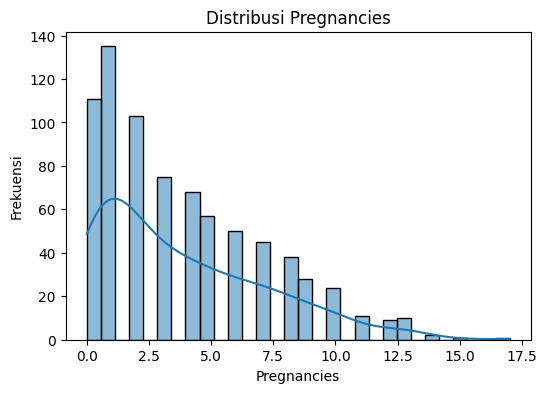

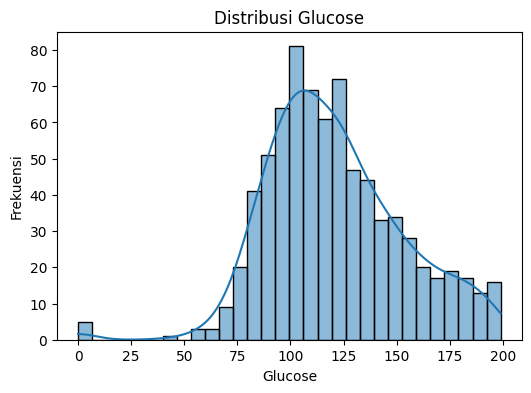

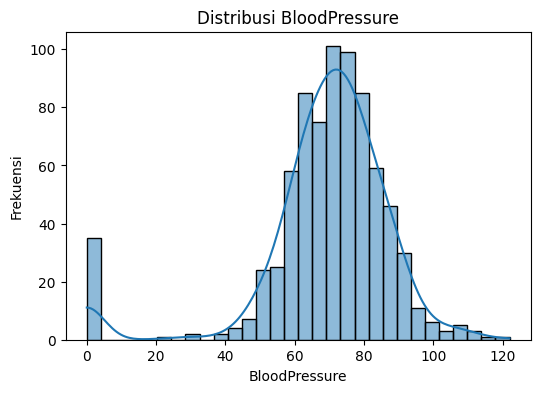

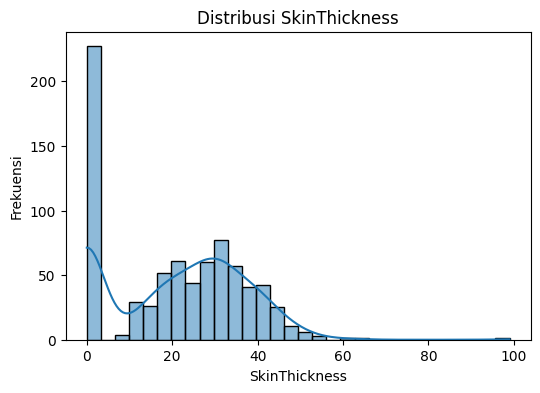

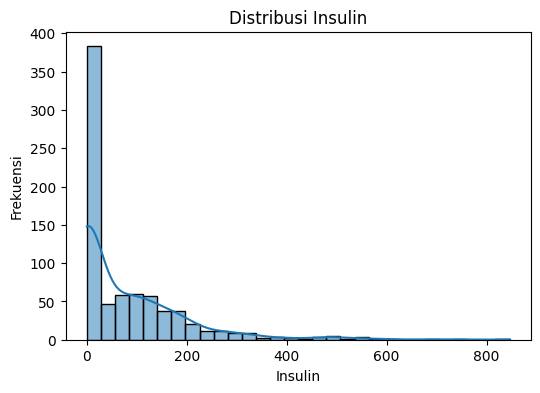

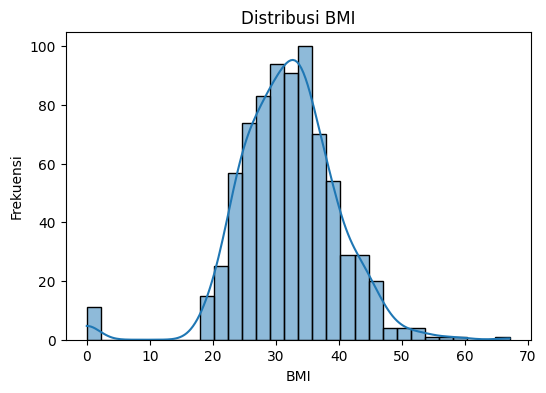

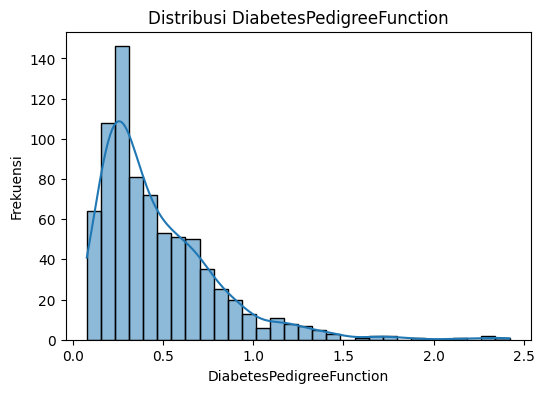

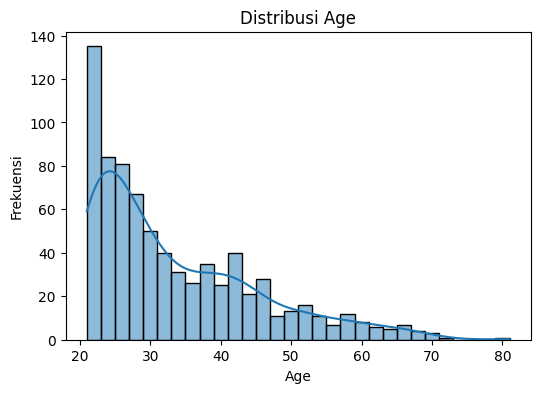

In [6]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.show()

Disini terlihat, meskipun dataset sudah di preprocess dari awal, masih ada Feature yang memiliki nilai 0 walaupun seharusnya tidak bisa mempunyai nilai 0.

Glucose, SkinThickness, BloodPressure, BMI dan Insulin seharusnya tidak ada nilai 0

# Menghilangkan Nilai 0

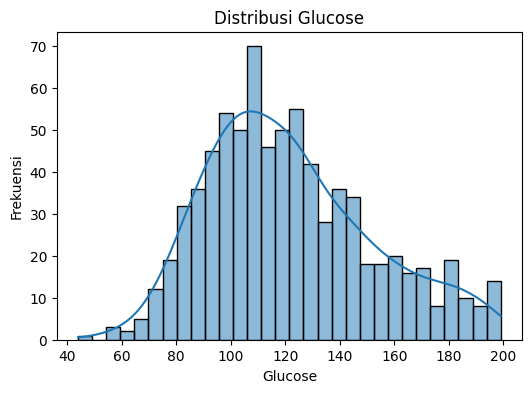

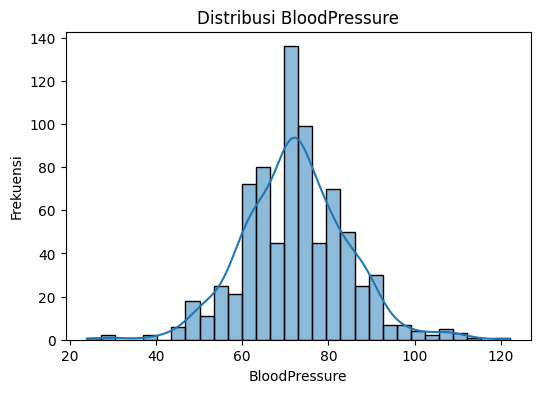

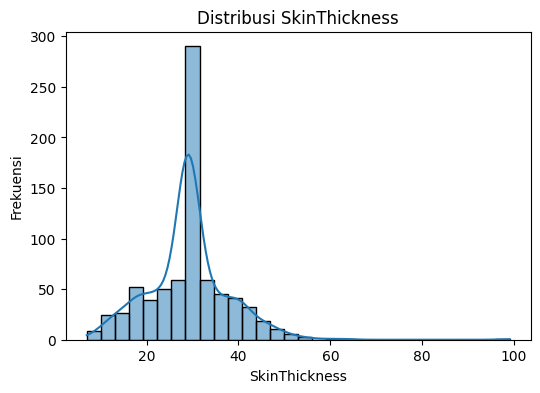

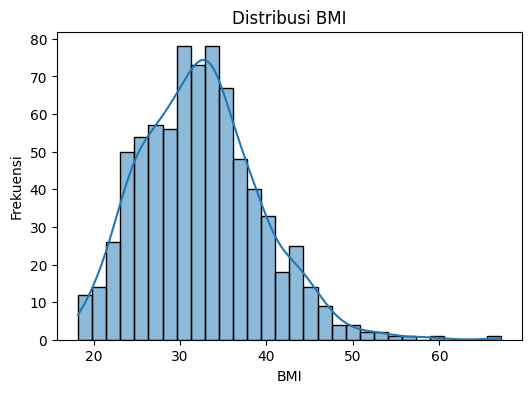

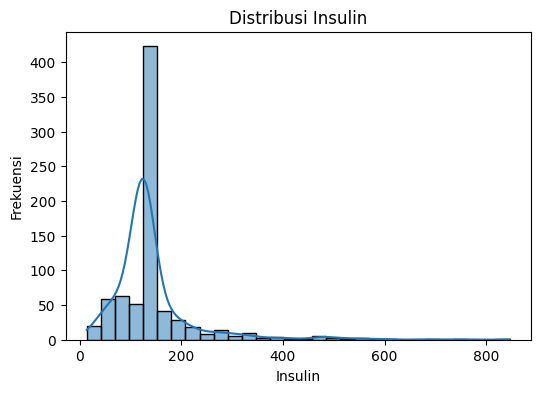

In [7]:
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]

for col in columns_with_zeros:
    median = data[col][data[col] != 0].median() 
    data[col] = data[col].replace(0, median)

for col in columns_with_zeros:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

Mengganti nilai 0 dengan median

# Training and Testing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
fitur = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
label = 'Outcome'


X = data[fitur]
y = data[label]



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membagi data menjadi 2, data training sebanyak 80% dari data dan data testing sebanyak 20%

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Normalisasi Data

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [13]:

# Inisialisasi model
models = {
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Pelatihan model
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[model_name] = model

Train Model menggunakan Gaussian Naive bayes, k-NN, dan decision tree

# Evaluasi

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


Model: Naive Bayes

Akurasi model: 0.7532467532467533

Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



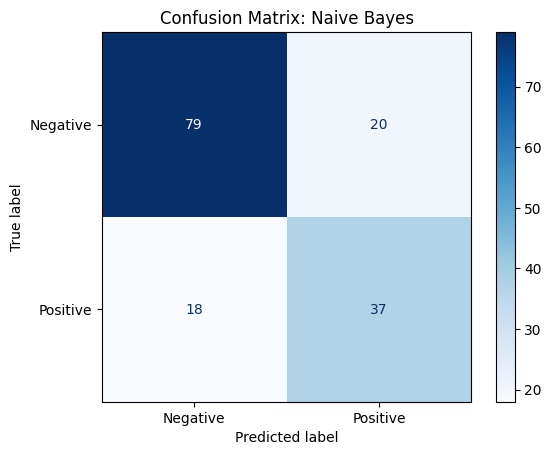


Model: k-NN

Akurasi model: 0.7207792207792207

Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



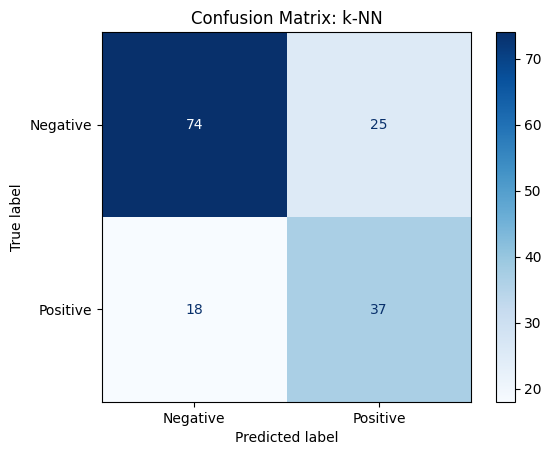


Model: Decision Tree

Akurasi model: 0.7142857142857143

Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



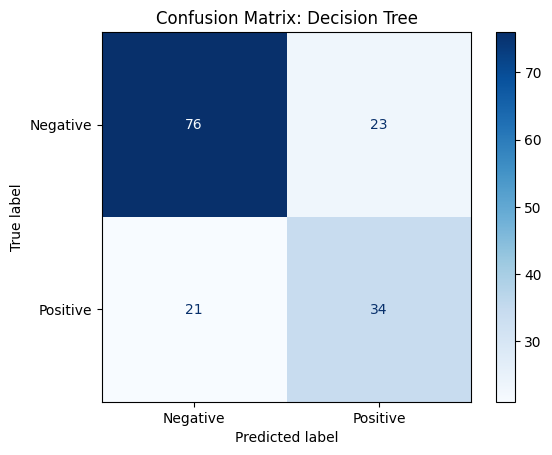

In [15]:
for model_name, model in trained_models.items():
    print(f"\nModel: {model_name}")
    

    y_pred = model.predict(X_test_scaled)
    
    print("\nAkurasi model:", accuracy_score(y_test, y_pred))
    

    print("\nLaporan klasifikasi:")
    print(classification_report(y_test, y_pred))
    

    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Kesimpulan



dari ketiga model, Naive bayes mendapatkan hasil akurasi yang paling baik yaitu 75% dibandingkan 72% dari k-NN dan 71% dari decision tree.

F1 score dari class 0 lebih rendah dari class 1, hal ini berarti model dapat memprediksi untuk tidak terkena diabetes lebih akurat dibanding untuk terkena diabetes